# Key Points:

### 1- You only want original ratings (no retweets) that have images. Though there are  tweets in the dataset, not all are dog ratings and some are retweets.
### 2- Assessing and cleaning:
- the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- Cleaning includes merging individual pieces of data according to the rules of tidy data.
  The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
### 3- Gathering:
- You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

# Gathering:
*.Importing enhanced twitter archieve

*.Downloading the tweet image predictions file that hosted on Udacity's servers and should be downloaded programmatically

*.Getting Tweet Data from twitter API

# libraries 

In [762]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import requests
import os 
import time
import pandas as pd 
import json
import re 
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings
import numpy as np
import spacy
import string
from PIL import Image
import pattern # for text lemmatization
from pattern.en import lemma
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pd.set_option('display.width',4000)
pd.set_option('max.colwidth',4000)
pd.options.display.float_format='{:,.2f}'.format

In [763]:
#load twitter archive file into pandas df.
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [764]:
#download image predictions file.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [765]:
#loading image predictions data
image_pred=pd.read_csv('image-predictions.tsv',sep='\t') #   sep='\t': data is seprated by tabs

In [766]:
#load_tweet-json 
with open('tweet-json','r') as file:
    df_api = pd.read_json(file, lines= True, encoding = 'utf-8')   
    df_api=df_api[['id','retweet_count','favorite_count']]

# Assessing 

# 1- Twitter Archive data  

In [767]:
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",nan,nan,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None


In [768]:
twitter_archive.tail(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2353,666033412701032449,nan,nan,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,nan,nan,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,nan,nan,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,nan,nan,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,nan,nan,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,nan,nan,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [769]:
twitter_archive.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
943,752701944171524096,nan,nan,2016-07-12 03:11:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: HEY PUP WHAT'S THE PART OF THE HUMAN BODY THAT CONNECTS THE FOOT AND THE LEG? 11/10 so smart https://t.co/XQ1tRUmO3z,"683,515,932,363,329,536.00","4,196,983,835.00",2016-01-03 05:11:12 +0000,"https://vine.co/v/ibvnzrauFuV,https://vine.co/v/ibvnzrauFuV",11,10,None,None,None,None,None
2010,672248013293752320,nan,nan,2015-12-03 02:56:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",10/10 for dog. 7/10 for cat. 12/10 for human. Much skill. Would pet all https://t.co/uhx5gfpx5k,nan,nan,NaN,https://twitter.com/dog_rates/status/672248013293752320/photo/1,10,10,None,None,None,None,None
557,803380650405482500,nan,nan,2016-11-28 23:30:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sonny. He's an in-home movie critic. That is his collection. He's very proud of it. 12/10 https://t.co/yPbCALoy2n,nan,nan,NaN,https://twitter.com/dog_rates/status/803380650405482500/photo/1,12,10,Sonny,None,None,None,None
252,844973813909606400,nan,nan,2017-03-23 18:07:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Brady. He's a recovering alcoholic. Demonstrating incredible restraint here. 12/10 don't give pup, don't give in, Brady https://t.co/B1iBuSq3hr",nan,nan,NaN,https://twitter.com/dog_rates/status/844973813909606400/photo/1,12,10,Brady,None,None,None,None


In [770]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [771]:
twitter_archive.duplicated().sum()

0

In [772]:
#quality issues in ['name']:
#1- name has None values not np.nan. 
#2- and a value!. 
#rating_numerator has two rows with zero value!.
#rating_denominator must be 10 but it has less than 10, and more than  10, so the rating score must be extract again.. 
for i in twitter_archive[['name','rating_numerator','rating_denominator']]:
    x = twitter_archive[i].value_counts()
    print("Column name is:",i,"and its values are:",'\n',x)
    print()

Column name is: name and its values are: 
 None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Ralphie      1
Zooey        1
Brooks       1
Jangle       1
Brudge       1
Name: name, Length: 957, dtype: int64

Column name is: rating_numerator and its values are: 
 12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

Column name is: rating_denominator and its values are: 
 10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90 

In [773]:
twitter_archive.name.unique()[10:]

array(['Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim', 'Zeke', 'Ralphus',
       'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya', 'Mingus', 'Derek',
       'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly', 'Earl', 'Lola',
       'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus',
       'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey', 'Harry',
       'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer', 'Cody',
       'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooey', 'Dave',
       'Jersey', 'Hobbes', 'Burt', 'Lorenzo', 'Carl', 'Jordy', 'M

In [774]:
# the name rows that contain "a" have a neme,but after words 'named' on text column,
#and this should be extracted with regex'
name_quality_issue=twitter_archive[(twitter_archive.name=="a")|(twitter_archive.name=="None")]
name_quality_issue.shape

(800, 17)

In [775]:
#some names should be extracted again from the text, because it appears after the word 'named'
name_quality_issue[name_quality_issue.name=="a"]['text'].sample(6)

1382                                      "Pupper is a present to world. Here is a bow for pupper." 12/10 precious as hell https://t.co/ItSsE92gCW
649               Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
1340                            Here is a heartbreaking scene of an incredible pupper being laid to rest. 10/10 RIP pupper https://t.co/81mvJ0rGRu
2161    This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl
2352     This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx
2311                                   This is a purebred Bacardi named Octaviath. Can shoot spaghetti out of mouth. 10/10 https://t.co/uEvsGLOFHa
Name: text, dtype: object

In [776]:
name_quality_issue[name_quality_issue.name=="None"]['text'].sample(6)

1628                                                                This pupper just got his first kiss. 12/10 he's so happy https://t.co/2sHwD7HztL
701                                                                                                          13/10 for breakdancing puppo @shibbnbot
444                                                           Some happy pupper news to share. 10/10 for everyone involved \nhttps://t.co/MefMAZX2uv
1391    When it's Janet from accounting's birthday but you can't eat the cake cuz it's chocolate. 10/10 hang in there pupper https://t.co/Fbdr5orUrJ
1317                                          Here's a sneak peek of me on spring break. 10/10 so many tired pups these days https://t.co/6aJrjKfNqX
621                         I didn't believe it at first but now I can see that voter fraud is a serious h*ckin issue. 11/10 https://t.co/7i0bDMbrVN
Name: text, dtype: object

In [777]:
# maybe i will drop these rows tho!.. one of them is a reply!.. 
rating_numerator_issue=twitter_archive[twitter_archive.rating_numerator==0]
rating_numerator_issue

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,nan,nan,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,nan,nan,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
1016,746906459439529985,"746,885,919,387,574,272.00","4,196,983,835.00",2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",nan,nan,NaN,https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,None,None,None,None,None


In [778]:
rating_denominator_issue=twitter_archive[(twitter_archive.rating_denominator > 10)|(twitter_archive.rating_denominator<10)]
rating_denominator_issue.shape

(23, 17)

In [779]:
#regex: it must extact denominator with \d{2} and equal 10 two digits only.
rating_denominator_issue['text'].sample(6)

2335        This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
1254                                    Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
1068    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
1598        Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating
1843                                     Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw
1635    Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55
Name: text, dtype: object

In [780]:
#the expanded_urls columns has  59 nan values which means no photos, and that not valid. 
twitter_archive.expanded_urls.isna().sum()

59

In [781]:
# there are a retwetted data, this is a validity issue. they must be deleted,then drop the columns..
retweeted_data=twitter_archive[twitter_archive.retweeted_status_id.notnull()]
retweeted_data.isnull().sum()

tweet_id                        0
in_reply_to_status_id         181
in_reply_to_user_id           181
timestamp                       0
source                          0
text                            0
retweeted_status_id             0
retweeted_status_user_id        0
retweeted_status_timestamp      0
expanded_urls                   1
rating_numerator                0
rating_denominator              0
name                            0
doggo                           0
floofer                         0
pupper                          0
puppo                           0
dtype: int64

In [782]:
# text column has quality issues[urls,punctuations,digits,user_names], it must be cleaning and normalizing.
twitter_archive['text'].sample(4)

1846                                                                           🎶 HELLO FROM THE OTHER SIIIIIIIIDE 🎶 10/10s https://t.co/GK2HJtkdQk
1450                                                          Here's a dog enjoying a sunset. 11/10 would trade lives with https://t.co/VsQdLxrv9h
1907    This pupper just wants a belly rub. This pupper has nothing to do w the tree being sideways now. 10/10 good pupper https://t.co/AyJ7Ohk71f
2150                                                                        This is Kloey. Her mother was a unicorn. 10/10 https://t.co/NvKJRYDosA
Name: text, dtype: object

In [783]:
#tidiness issue with [['doggo','floofer', 'pupper', 'puppo']]: 
# they must be tidied in one column, and extracted from text column
twitter_archive[['doggo','floofer', 'pupper', 'puppo']]

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None
...,...,...,...,...
2351,None,None,None,None
2352,None,None,None,None
2353,None,None,None,None
2354,None,None,None,None


In [784]:
twitter_archive[twitter_archive.text.str.contains('puppo')].sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1083,738537504001953792,nan,nan,2016-06-03 01:07:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bayley. She fell asleep trying to escape her evil fence enclosure. 11/10 night night puppo https://t.co/AxSiqAKEKu,nan,nan,NaN,"https://twitter.com/dog_rates/status/738537504001953792/photo/1,https://twitter.com/dog_rates/status/738537504001953792/photo/1",11,10,Bayley,None,None,None,puppo
191,855851453814013952,nan,nan,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,nan,nan,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo
663,790946055508652032,nan,nan,2016-10-25 16:00:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Betty. She's assisting with the dishes. Such a good puppo. 12/10 h*ckin helpful af https://t.co/dgvTPZ9tgI,nan,nan,NaN,https://twitter.com/dog_rates/status/790946055508652032/photo/1,12,10,Betty,None,None,None,puppo


# 2- Image_pred 

In [785]:
image_pred.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.47,True,collie,0.16,True,Shetland_sheepdog,0.06,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.51,True,miniature_pinscher,0.07,True,Rhodesian_ridgeback,0.07,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.60,True,malinois,0.14,True,bloodhound,0.12,True


In [786]:
image_pred.tail(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.72,True,malamute,0.08,True,kelpie,0.03,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.32,True,Pekinese,0.09,True,papillon,0.07,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.10,False,bagel,0.09,False,banana,0.08,False


In [787]:
image_pred.sample(6)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1121,726887082820554753,https://pbs.twimg.com/media/ChZr8SdWIAAVQKt.jpg,1,soft-coated_wheaten_terrier,0.52,True,Irish_terrier,0.16,True,Chesapeake_Bay_retriever,0.13,True
418,674036086168010753,https://pbs.twimg.com/media/CVqoPslWEAEk7EC.jpg,1,toy_poodle,0.69,True,miniature_poodle,0.15,True,Maltese_dog,0.05,True
1089,719332531645071360,https://pbs.twimg.com/media/CfuVGl3WEAEKb16.jpg,1,Dandie_Dinmont,0.22,True,miniature_poodle,0.20,True,Norfolk_terrier,0.09,True
1606,800459316964663297,https://pbs.twimg.com/media/CxvNfrhWQAA2hKM.jpg,1,teddy,0.31,False,ice_bear,0.18,False,Christmas_stocking,0.17,False
1827,835297930240217089,https://pbs.twimg.com/media/C5eTCOVUsAAWhvc.jpg,1,Rottweiler,0.34,True,Border_terrier,0.34,True,Gordon_setter,0.05,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.20,True,komondor,0.19,True,soft-coated_wheaten_terrier,0.08,True


In [788]:
#the data has missing rows..
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [789]:
# image_pred.duplicated().sum()
for column in image_pred.columns:
    duplicate_column = image_pred[column].duplicated().sum()
    print(column,': ', duplicate_column)

tweet_id :  0
jpg_url :  66
img_num :  2071
p1 :  1697
p1_conf :  69
p1_dog :  2073
p2 :  1670
p2_conf :  71
p2_dog :  2073
p3 :  1667
p3_conf :  69
p3_dog :  2073


In [790]:
#there are a duplicated values in photos
# image_pred[image_pred.jpg_url.duplicated()][6:]
image_pred[image_pred.jpg_url=='https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1045,712809025985978368,https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg,1,Labrador_retriever,0.87,True,carton,0.10,False,pug,0.01,True
1594,798697898615730177,https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg,1,Labrador_retriever,0.87,True,carton,0.10,False,pug,0.01,True


In [791]:
image_pred.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [792]:
#p1 has lowercase and uppercase letters
display(image_pred.p1.value_counts())
display(image_pred.p2.value_counts())
display(image_pred.p3.value_counts())

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
quilt                   1
revolver                1
tiger_shark             1
terrapin                1
pillow                  1
Name: p1, Length: 378, dtype: int64

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
standard_schnauzer      1
drake                   1
neck_brace              1
assault_rifle           1
shower_cap              1
Name: p2, Length: 405, dtype: int64

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
broccoli               1
affenpinscher          1
Windsor_tie            1
cloak                  1
padlock                1
Name: p3, Length: 408, dtype: int64

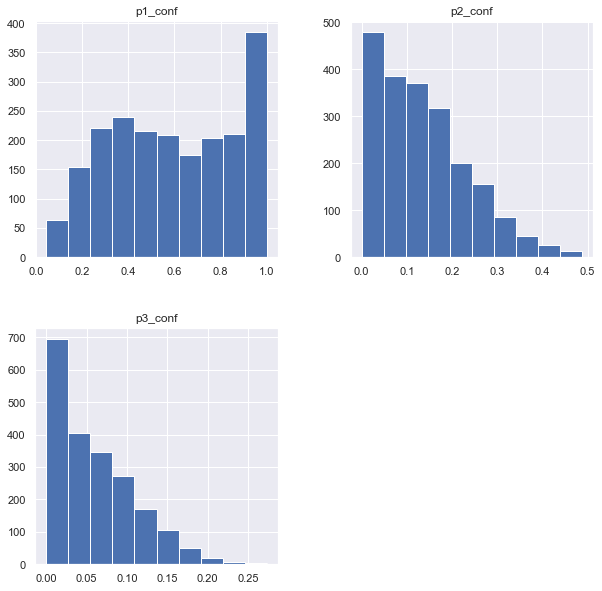

In [793]:
#visual assessing for algorithms distrbution 
#notice that the first algorithm has a high predication.. so we can drop others.
algorithms_distrbution=image_pred[['p1_conf','p2_conf','p3_conf']]
pd.plotting.hist_frame(algorithms_distrbution,figsize=(10,10));

# 3- API data 

In [794]:
df_api.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [795]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


In [796]:
df_api.describe()

,id,retweet_count,favorite_count
count,"2,354.00","2,354.00","2,354.00"
mean,"742,697,816,435,063,552.00","3,164.80","8,080.97"
std,"68,528,120,712,910,648.00","5,284.77","11,814.77"
min,"666,020,888,022,790,144.00",0.00,0.00
25%,"678,397,510,244,808,704.00",624.50,"1,415.00"
50%,"719,459,571,111,233,536.00","1,473.50","3,603.50"
75%,"799,305,849,241,918,464.00","3,652.00","10,122.25"
max,"892,420,643,555,336,192.00","79,515.00","132,810.00"


In [797]:
df_api.duplicated().sum()

0

In [798]:
df_api.isna().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

# Assessment Summery:
   ## Quality:
    1. Enhanced Archive Data:
       - The critria of the project foucs on original tweets only, but the data has 181 retweeted rows in 
       [retweeted_status_id,retweeted_status_user_id , retweeted_status_timestamp] should be dropped then the columns.
       - Also there are replied tweets in ['in_reply_to_status_id','in_reply_to_user_id','in_reply_to_user_id'] and that not  
       support the validity of the project.
       - the expanded_ url column has missing values,which means no photos, and that isn't valid too. 
       - the name column has 'None' instead of np.nan and strange values such as (a,an).
       - name column given lowercas.
       - timestamp column has wrong datatype 'object' instead of datetime.
       - rating_denominator has more than 10 and less than 10.
       - tewwt_id column should be converted to string type instead of integers.
       - text column has [urls,punctuations,digits,user_names], it should be cleaned and normalizied.
    2. Image predication:
       -jpg_url has duplicated values.
       -imag_num is useless. 
       -p1 has lowercase and upper case
       - tewwt_id column should be converted to string type instead of integers.
    3. API data:
       -id column should be renamed to tweet_id to match with other dataframes.
       - id column should be converted to string type instead of integers.
   ## Tidiness:
       1. Enhanced Archive Data:
          - ['doggo', 'floofer', 'pupper', 'puppo'] should be concatenated at one column dog_stage. 
          - [rating_numerator,rating_denominator] should be divided and represent as one column "ratings".
       2. Image predication:
          - there are three algorithms with different accuracy, we should choose the highest one and keep its predication only.
       Generally all the data should be merged as one file.

# Cleaning

## first of all, take a copy from the original data.

In [799]:
df_archive=twitter_archive.copy()
df_image=image_pred.copy()
df_json=df_api.copy()

In [800]:
df_archive.columns ,df_image.columns,df_json.columns

(Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'], dtype='object'),
 Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], dtype='object'),
 Index(['id', 'retweet_count', 'favorite_count'], dtype='object'))

# Quality

# Archive data

# Q1

#### Define
- remove all retweets rows from the data, then drop columns:
['retweeted_status_id','retweeted_status_timestamp','retweeted_status_user_id']  

### Code

In [801]:
retweets=df_archive[df_archive.retweeted_status_id.notna()]
df_archive.drop(retweets.index,axis=0,inplace=True)

In [802]:
df_archive.drop( ['retweeted_status_id','retweeted_status_timestamp','retweeted_status_user_id']\
               ,inplace=True,axis=1)

### Test

In [803]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


# Q2

#### Define
- remove rows that do not have a photo in expanded_urls column.

#### code

In [804]:
missing_photos=df_archive[df_archive.expanded_urls.isna()]
df_archive.drop(missing_photos.index,axis=0,inplace=True)

### test

In [805]:
df_archive.expanded_urls.isna().sum() , df_archive.shape

(0, (2117, 14))

# Q3

#### Define 
- remove reply columns ['in_reply_to_status_id','in_reply_to_user_id'] as they are invalid data.

### code

In [806]:
df_archive.drop(['in_reply_to_status_id','in_reply_to_user_id'],inplace=True,axis=1)

### test

In [807]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2117 non-null int64
timestamp             2117 non-null object
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
dtypes: int64(3), object(9)
memory usage: 215.0+ KB


# Q4

#### Define
-  replace wrong dogs names with the pattern that indicaetes some names come after the word 'named' in text column(23 values).
- it would be extracted with regular exepresion and string method.

### code

In [808]:
modify_wrong_names = df_archive[df_archive.text.str.contains(r"(?<=\bnamed).[A-z]+")]['text'].str\
.findall(r'(?<=\bnamed).[A-z]+').str.get(0)
print(f'the length of the values are: {len(modify_wrong_names)},\nnew_names:\n{modify_wrong_names}',end=' ')

the length of the values are: 23,
new_names:
1853         Wylie
1955           Kip
2034         Jacob
2066         Rufus
2116         Spork
2125      Cherokee
2128         Hemry
2146       Alphred
2161       Alfredo
2166          Zeus
2191         Leroi
2204         Berta
2218          Chuk
2227          Guss
2235       Alfonso
2249        Cheryl
2255       Jessiga
2264         Klint
2269       Tickles
2273          Kohl
2304          Pepe
2311     Octaviath
2314          Johm
Name: text, dtype: object 

In [809]:
df_archive.loc[modify_wrong_names.index, 'name'] = modify_wrong_names.values

### test 

In [810]:
df_archive.name.value_counts()

None       619
a           36
Lucy        11
Charlie     11
Oliver      10
          ... 
Chaz         1
Striker      1
Samsom       1
Farfle       1
Pip          1
Name: name, Length: 979, dtype: int64

# Q5

#### define
- name column still have invalid names and None instead of np.nan.
- replace them with np.nan (replace method).

### code

In [811]:
unvalid_names=['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad',
       'an', 'very', 'just', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'the',
       'by', 'officially', 'life', 'light', 'space', 'None']
df_archive.name=df_archive.name.replace(unvalid_names,np.nan)

### test

In [812]:
df_archive.name.value_counts()

Charlie     11
Lucy        11
Cooper      10
Oliver      10
Penny        9
            ..
Harper       1
Al           1
Ginger       1
Sundance     1
Murphy       1
Name: name, Length: 953, dtype: int64

# Q6

#### Define
- convert the type of name column to srting, and normalize the names with title method.

### code

In [813]:
df_archive.name=df_archive.name.astype(str)
df_archive.name=df_archive.name.apply(lambda x: x.title())

### test

In [814]:
df_archive.name.value_counts()

Nan         703
Lucy         11
Charlie      11
Cooper       10
Oliver       10
           ... 
Dayz          1
Al            1
Ginger        1
Sundance      1
Murphy        1
Name: name, Length: 954, dtype: int64

# Q7

#### Define 
- convert timestamp column datatype to datetime.

### code

In [815]:
df_archive.timestamp=pd.to_datetime(df_archive.timestamp)

### test

In [816]:
df_archive.timestamp.dtype

datetime64[ns, UTC]

# Q8 

#### Define 
- re extract digits with legnth 2 after forward slash from text column to modify rating_denominator then replace unmeaningful values in rating_denominator (more than 10, less than 10) with 10.

In [817]:
normalized_denominator=df_archive[(df_archive.rating_denominator < 10) | (df_archive.rating_denominator >10)]
normalized_denominator.text[:3]

433                                                                          The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516    Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
902                                                                                               Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
Name: text, dtype: object

In [818]:
normalized_denominator.rating_denominator.describe()

count    18.00
mean     68.94
std      51.36
min       2.00
25%      25.00
50%      60.00
75%     105.00
max     170.00
Name: rating_denominator, dtype: float64

In [819]:
normalized_denominator['modified_ratings']=normalized_denominator.text.str.findall(r'(?<=/)\b\d{2}\b').str.get(1)

C:\Users\-TOSHIBA-\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [820]:
normalized_denominator.modified_ratings.fillna(10,inplace=True)

C:\Users\-TOSHIBA-\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [821]:
normalized_denominator.modified_ratings= normalized_denominator.modified_ratings.astype('int64')

C:\Users\-TOSHIBA-\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [827]:
df_archive.rating_denominator=10

### test

In [828]:
df_archive.rating_denominator.describe()

count   2,117.00
mean       10.00
std         0.00
min        10.00
25%        10.00
50%        10.00
75%        10.00
max        10.00
Name: rating_denominator, dtype: float64

In [681]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2117 non-null int64
timestamp             2117 non-null datetime64[ns, UTC]
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(8)
memory usage: 295.0+ KB


# Q9

#### Define
- convert tweet_id datatype to string

### code

In [829]:
df_archive.tweet_id=df_archive.tweet_id.astype(str)

### test

In [830]:
df_archive.tweet_id.dtype

dtype('O')

# Q10

#### Define
- clean and normalize text column, remove [punctuations, urls, usernames, digits],then normalize and lemmatize.

### code

In [831]:
def process_tweets(text):
    text =re.sub(r"@[a-zA-Z0-9]+","",text) #remove users_names
    text=text.lower()
    text=re.sub(r'http\S+', '', text)
    text=re.sub(r'#', '', text) #remove hashtag sign only 
    text=re.sub(r"\d[0-9]?","",text)
    text=re.sub(r"\W*\b\w{1}\b","",text)
    text=re.sub(r"\W*\b\w{2}\b","",text)
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(text)
    cleaned_words=[]
    for word in tweet_tokens:

        # Go through every word in your tokens list
        if (word not in stopwords.words('english')
            and word not in string.punctuation):
            cleaned_words.append(word)

    words=" ".join(cleaned_words)
    lemmatization=" ".join(lemma(word) for word in words.split())
    return lemmatization

In [832]:
t=time.time()
df_archive['text'] = np.vectorize(process_tweets)(df_archive['text'])
time.time() -t

12.994355201721191

### test 

In [833]:
df_archive.text.head(5)

0                                      phinea mystical boy ever appear hole donut
1                          tilly check pup hope available pat snug boop whole bit
2    archie rare norwegian pounce corgo live tall grass never know one may strike
3                                      darla commence snooze mid meal happen best
4                franklin would like stop call cute fierce shark respect barkweek
Name: text, dtype: object

# image data 

 # Q11 

#### Define
- drop jpg_url has duplicated values.

### code

In [834]:
df_image =df_image.drop_duplicates('jpg_url', keep='last')

### test


In [835]:
sum(df_image.jpg_url.duplicated())

0

# Q12

#### Define
- drop img_num as it is useless. 

### code

In [836]:
df_image.drop('img_num',inplace=True,axis=1)

C:\Users\-TOSHIBA-\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### test

In [837]:
df_image.columns

Index(['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], dtype='object')

# Q13

#### define 
- conver tweet_id to string.

### code

In [838]:
df_image.tweet_id=df_image.tweet_id.astype(str)

C:\Users\-TOSHIBA-\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### test 

In [839]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2009 non-null object
jpg_url     2009 non-null object
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), object(5)
memory usage: 147.1+ KB


# Q14

#### Define
 - p1 has lowercase and uppercase.
 - convert p1 values with tiltle method.

In [840]:
df_image.p1=df_image.p1.apply(lambda x: x.title())

### test

In [841]:
df_image.p1.head(3)

0    Welsh_Springer_Spaniel
1                   Redbone
2           German_Shepherd
Name: p1, dtype: object

# API data

# Q15

#### Dfine
- Rename id column to tweet id. and convert it to string type instead of integers.

### code

In [842]:
df_json.rename(columns={'id':'tweet_id'},inplace=True)

In [843]:
df_json.tweet_id=df_json.tweet_id.astype(str)

### test

In [844]:
df_json.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

In [845]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


# Tidinees 

# Archive data

# T1

#### Define
- drop ['doggo', 'floofer', 'pupper', 'puppo'] columns, and re extract the values with regular expression to concatenate them at one column dog_stage.


### code

In [846]:
df_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'],inplace=True,axis=1)

In [847]:
df_archive['dog_stage']=df_archive.text.apply(lambda x: re.findall(r'doggo|floofy|floofer|pupper|puppo',x))

In [848]:
df_archive['dog_stage']=df_archive['dog_stage'].apply(lambda x: ' '.join(x).replace(' ','-')).replace('',np.nan)

In [849]:
df_archive['dog_stage'].value_counts()

pupper                       238
doggo                         76
puppo                         28
pupper-pupper                  9
floofer                        9
doggo-pupper                   6
pupper-doggo                   3
floofy                         3
doggo-doggo                    2
pupper-pupper-pupper           1
doggo-floofer                  1
pupper-doggo-pupper-doggo      1
puppo-doggo-puppo              1
puppo-doggo                    1
doggo-floofy                   1
Name: dog_stage, dtype: int64

In [850]:
df_archive.loc[df_archive.dog_stage == 'pupper-doggo-pupper-doggo', 'dog_stage'] = 'doggo-pupper'
df_archive.loc[df_archive.dog_stage == 'puppo-doggo-puppo ', 'dog_stage'] = 'puppo-doggo'
df_archive.loc[df_archive.dog_stage == 'floofy', 'dog_stage'] = 'floofer'
df_archive.loc[df_archive.dog_stage == 'pupper-pupper', 'dog_stage']='pupper'
df_archive.loc[df_archive.dog_stage == 'doggo-doggo', 'dog_stage']='doggo'
df_archive.loc[df_archive.dog_stage == 'pupper-doggo', 'dog_stage']='doggo-pupper'
df_archive.loc[df_archive.dog_stage == 'pupper-pupper-pupper', 'dog_stage']='pupper'

### test 

In [851]:
df_archive.dog_stage.value_counts()

pupper               248
doggo                 78
puppo                 28
floofer               12
doggo-pupper          10
doggo-floofer          1
puppo-doggo-puppo      1
puppo-doggo            1
doggo-floofy           1
Name: dog_stage, dtype: int64

In [852]:
df_archive['dog_stage'].notna().sum()

380

# T2

#### Define
- divide [rating_numerator,rating_denominator] represente them as one column "ratings".

### code

In [853]:
df_archive['ratings'] = np.divide(df_archive.rating_numerator,df_archive.rating_denominator)

### test

In [854]:
df_archive['ratings'].sample(5)

1106   1.30
906    0.90
1393   1.00
2196   1.10
1841   1.10
Name: ratings, dtype: float64

# image data

# T3

#### Define
- choose the algorithm with the highest accuracy  p1_conf, and keep its classification, and rename p1 to breed and p1_conf to confidence then drop other algorithms.

In [855]:
#p1_conf has the highest accuracy.
df_image[['p1_conf','p2_conf','p3_conf']].describe()

,p1_conf,p2_conf,p3_conf
count,"2,009.00","2,009.00","2,009.00"
mean,0.59,0.13,0.06
std,0.27,0.10,0.05
min,0.04,0.00,0.00
25%,0.36,0.05,0.02
50%,0.59,0.12,0.05
75%,0.85,0.19,0.09
max,1.00,0.49,0.27


### code

In [856]:
df_image.columns

Index(['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], dtype='object')

In [857]:
df_image.rename(columns={'p1_conf':'confidence','p1':'breed'},inplace=True)
df_image.drop(['p2_conf','p3_conf','p2','p3','p1_dog', 'p2_dog','p3_dog'],inplace=True,axis=1)

C:\Users\-TOSHIBA-\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


### test

In [858]:
df_image.head()

,tweet_id,jpg_url,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_Springer_Spaniel,0.47
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.51
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_Shepherd,0.60
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_Ridgeback,0.41
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_Pinscher,0.56


# T4

#### Define
- merge 3 datasets to one csv file.

### code

In [859]:
df = pd.merge(df_archive, df_image, on='tweet_id')
df = pd.merge(df, df_json, on = 'tweet_id')

# test

In [860]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 0 to 1927
Data columns (total 15 columns):
tweet_id              1928 non-null object
timestamp             1928 non-null datetime64[ns, UTC]
source                1928 non-null object
text                  1928 non-null object
expanded_urls         1928 non-null object
rating_numerator      1928 non-null int64
rating_denominator    1928 non-null int64
name                  1928 non-null object
dog_stage             334 non-null object
ratings               1928 non-null float64
jpg_url               1928 non-null object
breed                 1928 non-null object
confidence            1928 non-null float64
retweet_count         1928 non-null int64
favorite_count        1928 non-null int64
dtypes: datetime64[ns, UTC](1), float64(2), int64(4), object(8)
memory usage: 241.0+ KB


In [861]:
df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,ratings,jpg_url,breed,confidence,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",phinea mystical boy ever appear hole donut,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,1.30,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,0.10,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",tilly check pup hope available pat snug boop whole bit,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,1.30,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.32,6514,33819


# storing data

In [862]:
df.to_csv('twitter_archive_master.csv',index=False)

# Visualization 

In [863]:
#load the twitter_archieve_master data
twitter_archieve_master= pd.read_csv('twitter_archive_master.csv')

In [864]:
twitter_archieve_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'dog_stage', 'ratings', 'jpg_url', 'breed', 'confidence', 'retweet_count', 'favorite_count'], dtype='object')

# Analysis for the most favorite dog type

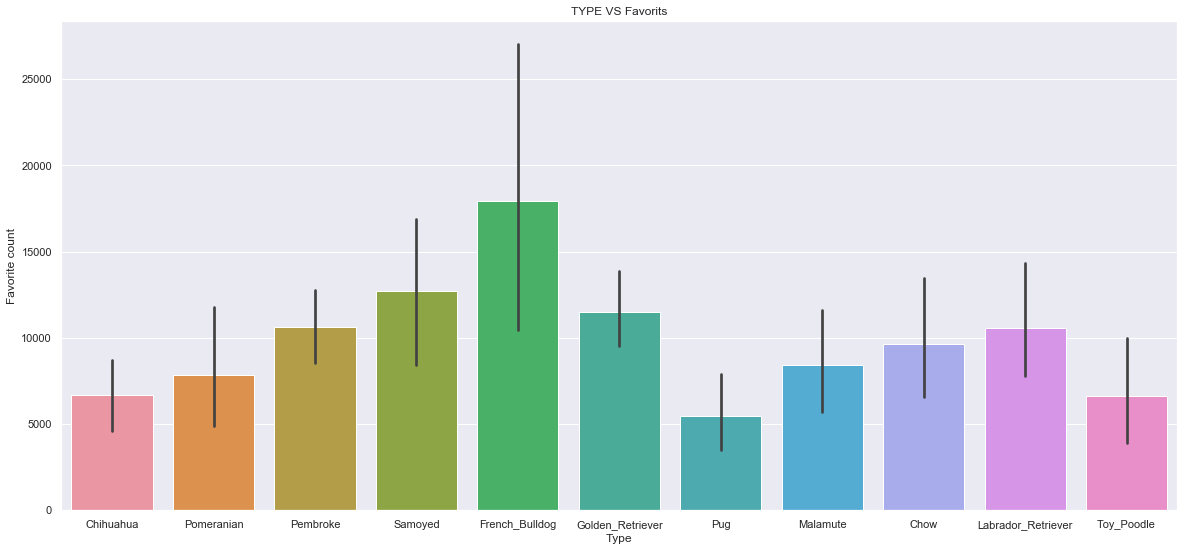

In [865]:
df_dog_type = twitter_archieve_master.groupby('breed').filter(lambda x: len(x) >= 25)
fig, ax = plt.subplots(figsize=(20,9))
g=sns.barplot(x='breed',y='favorite_count',data=df_dog_type,ax=ax);
ax.set(xlabel='Type', ylabel='Favorite count', title='TYPE VS Favorits');
plt.show()

# insight:
- french bulldog is the most favorite dog. 

# ratings distribuation

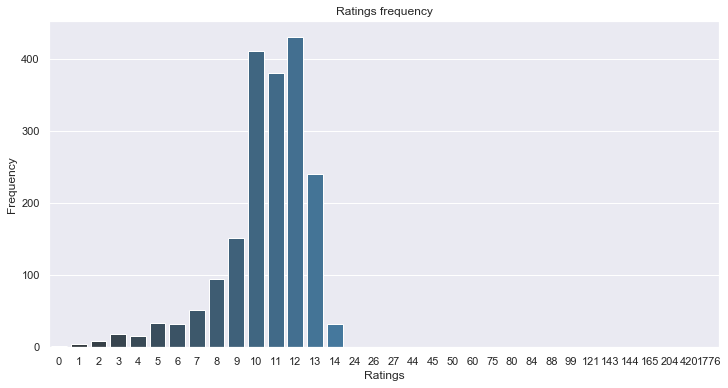

In [866]:
data = twitter_archieve_master.rating_numerator.value_counts()

x = data.index
y = data.values
fig, ax = plt.subplots(figsize=(12, 6))
g = sns.barplot(x, y, palette='Blues_d', ax=ax)
ax.set(xlabel='Ratings', ylabel='Frequency', title='Ratings frequency')
plt.show()

# Insight:

- The most frequent rating is 12/10

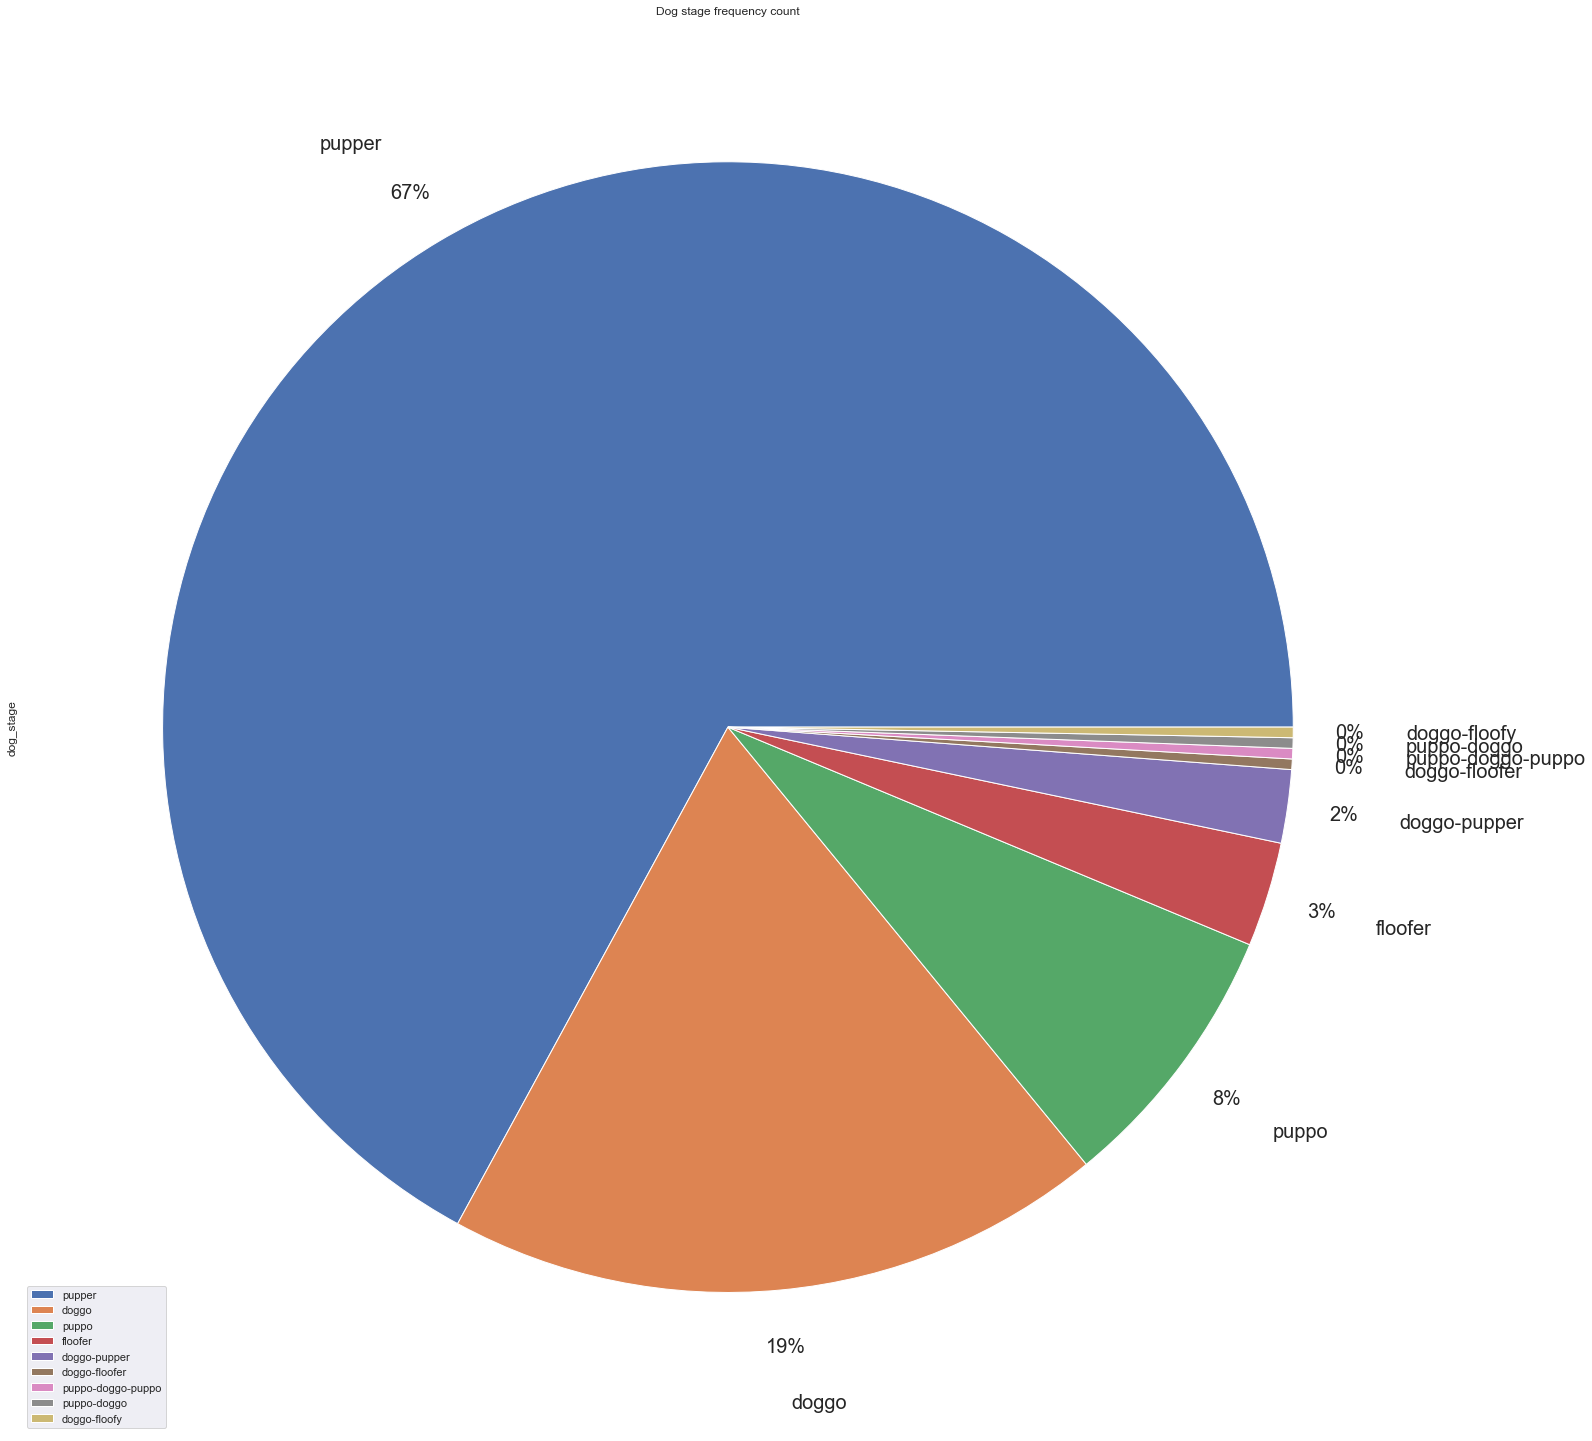

In [867]:
twitter_archieve_master.dog_stage.value_counts().plot(kind='pie',title='Dog stage frequency count',\
                                                       autopct='%1.0f%%',\
                                                      pctdistance=1.1, labeldistance=1.2\
                                                      ,figsize=(26,26),legend=True,fontsize=20);

# insight:
- pupper has the highest dog stage.

# dog_stage with high favorite 

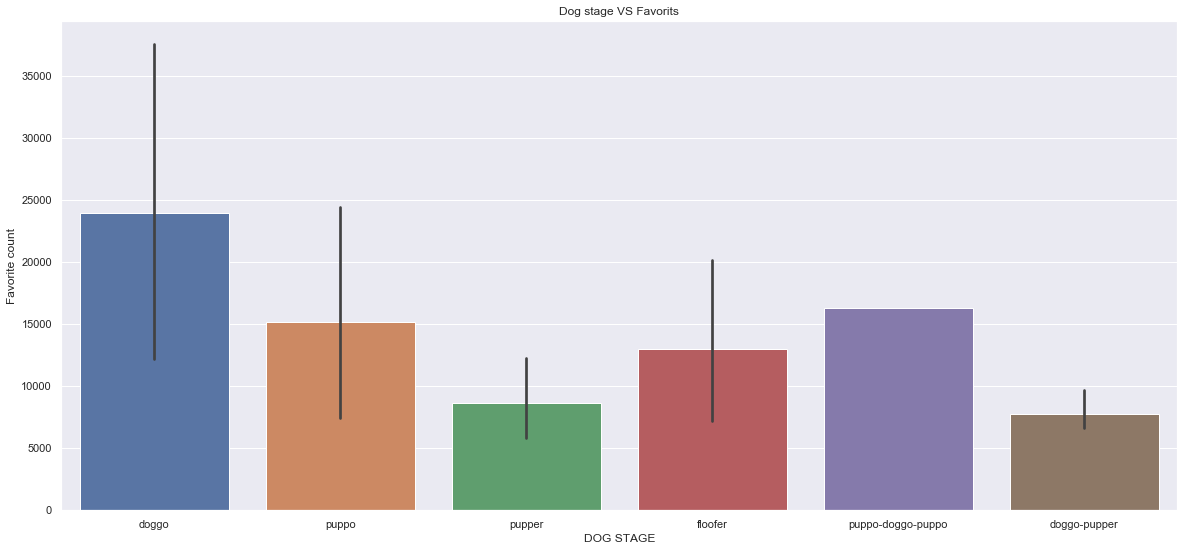

In [868]:
fig, ax = plt.subplots(figsize=(20,9))
g=sns.barplot(x='dog_stage',y='favorite_count',data=df_dog_type,ax=ax);
ax.set(xlabel='DOG STAGE', ylabel='Favorite count', title='Dog stage VS Favorits');
plt.show()

# insight:

 - doggo is the highest favorite. 

# relationship between favourite counts and retweets

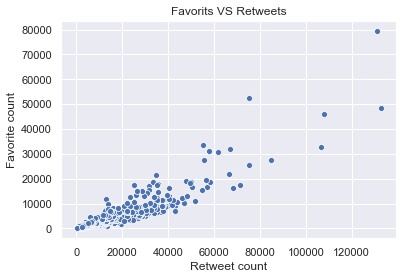

In [869]:
ax=sns.scatterplot(x='favorite_count',y='retweet_count',data=twitter_archieve_master);
ax.set(xlabel='Retweet count', ylabel='Favorite count', title='Favorits VS Retweets');
plt.show()

# insight:
- there is a positive linear relation between favorite and retweets. 'highly correlated' 

# word cloud 
- let's see the most frequent words in tweets(from text column) with word cloud. 

In [870]:
text = " ".join(str(tweet) for tweet in twitter_archieve_master.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 111539 words in the combination of all review.


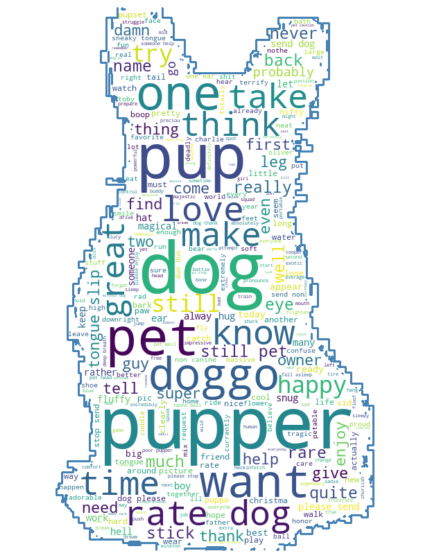

In [871]:
mask = np.array(Image.open('french bulldog.jpg'))
stopwords = set(STOPWORDS)
stopwords.update(['look', 'tho', 'see', 'good', 'hello', 'day', 'say', 'Meet','ckin'])
wordcloud = WordCloud( max_words=300, stopwords=stopwords, 
                      background_color='white', contour_width=3,
                      contour_color='steelblue', mask=mask).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('world_cloud.jpeg')
plt.show()